In [14]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d

In [2]:
# Example empirical edge spread functions
!ls esf

hires-Bottom-01-x.npy hires-Right-04-y.npy  lores-Left-03-x.npy
hires-Bottom-01-y.npy hires-Right-05-x.npy  lores-Left-03-y.npy
hires-Bottom-02-x.npy hires-Right-05-y.npy  lores-Left-04-x.npy
hires-Bottom-02-y.npy hires-Top-01-x.npy    lores-Left-04-y.npy
hires-Bottom-03-x.npy hires-Top-01-y.npy    lores-Left-05-x.npy
hires-Bottom-03-y.npy hires-Top-02-x.npy    lores-Left-05-y.npy
hires-Bottom-04-x.npy hires-Top-02-y.npy    lores-Right-01-x.npy
hires-Bottom-04-y.npy hires-Top-03-x.npy    lores-Right-01-y.npy
hires-Bottom-05-x.npy hires-Top-03-y.npy    lores-Right-02-x.npy
hires-Bottom-05-y.npy hires-Top-04-x.npy    lores-Right-02-y.npy
hires-Left-01-x.npy   hires-Top-04-y.npy    lores-Right-03-x.npy
hires-Left-01-y.npy   hires-Top-05-x.npy    lores-Right-03-y.npy
hires-Left-02-x.npy   hires-Top-05-y.npy    lores-Right-04-x.npy
hires-Left-02-y.npy   lores-Bottom-01-x.npy lores-Right-04-y.npy
hires-Left-03-x.npy   lores-Bottom-01-y.npy lores-Right-05-x.npy
hires-Left-03-y.npy   lores-Bot

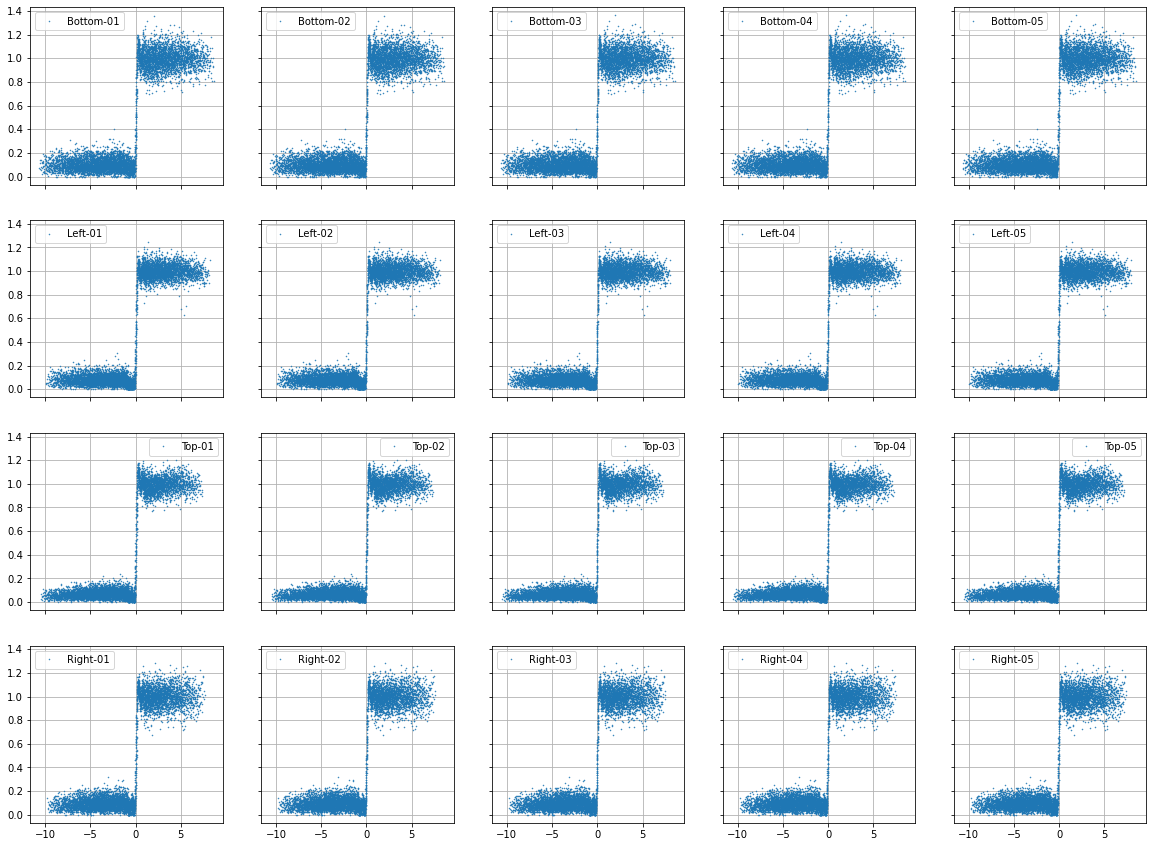

In [24]:
names = [
    "hires-Bottom-01",
    "hires-Bottom-02",
    "hires-Bottom-03",
    "hires-Bottom-04",
    "hires-Bottom-05",
    "hires-Left-01",
    "hires-Left-02",
    "hires-Left-03",
    "hires-Left-04",
    "hires-Left-05",
    "hires-Top-01",
    "hires-Top-02",
    "hires-Top-03",
    "hires-Top-04",
    "hires-Top-05",
    "hires-Right-01",
    "hires-Right-02",
    "hires-Right-03",
    "hires-Right-04",
    "hires-Right-05"
]

fig, axs = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(20, 15))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    ax.plot(x, y, '.', markersize=1, label=name[6:])
    ax.grid(True)
    ax.legend()

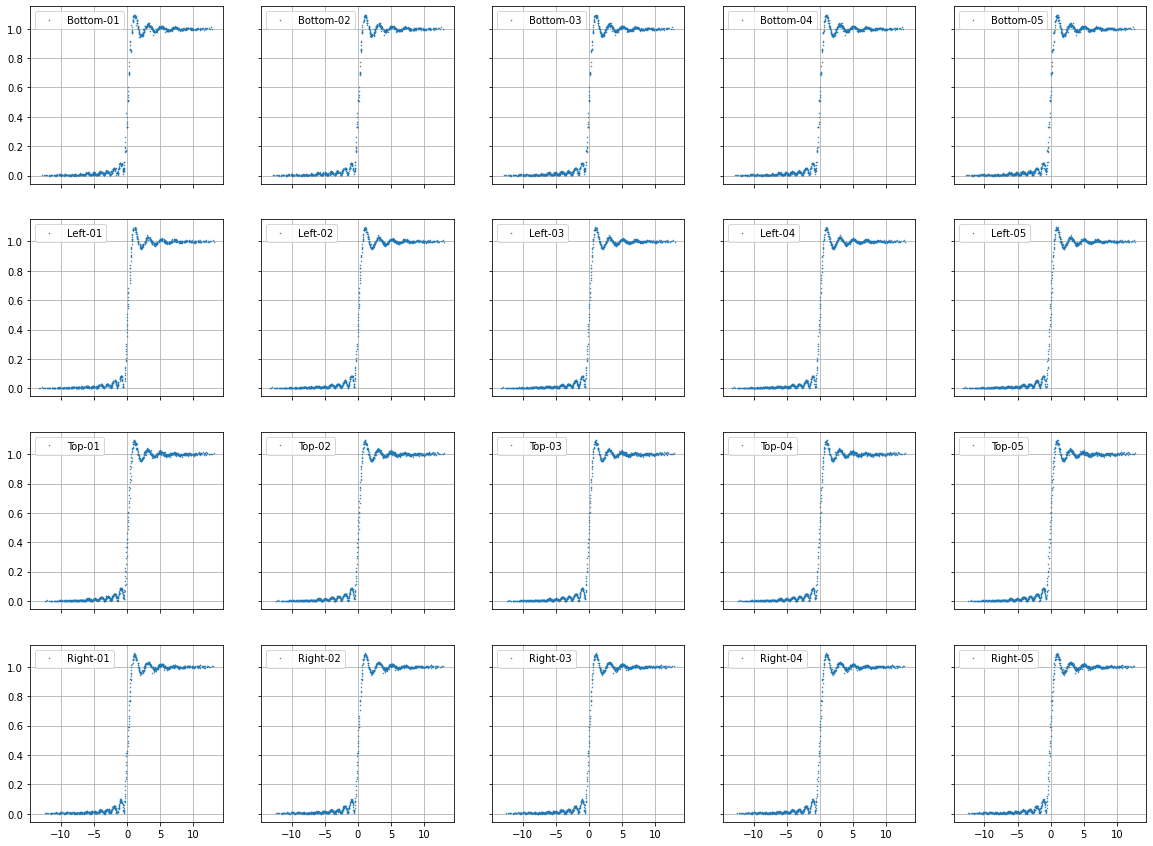

In [25]:
names = [
    "lores-Bottom-01",
    "lores-Bottom-02",
    "lores-Bottom-03",
    "lores-Bottom-04",
    "lores-Bottom-05",
    "lores-Left-01",
    "lores-Left-02",
    "lores-Left-03",
    "lores-Left-04",
    "lores-Left-05",
    "lores-Top-01",
    "lores-Top-02",
    "lores-Top-03",
    "lores-Top-04",
    "lores-Top-05",
    "lores-Right-01",
    "lores-Right-02",
    "lores-Right-03",
    "lores-Right-04",
    "lores-Right-05"
]

fig, axs = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(20, 15))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    ax.plot(x, y, '.', markersize=1, label=name[6:])
    ax.grid(True)
    ax.legend()

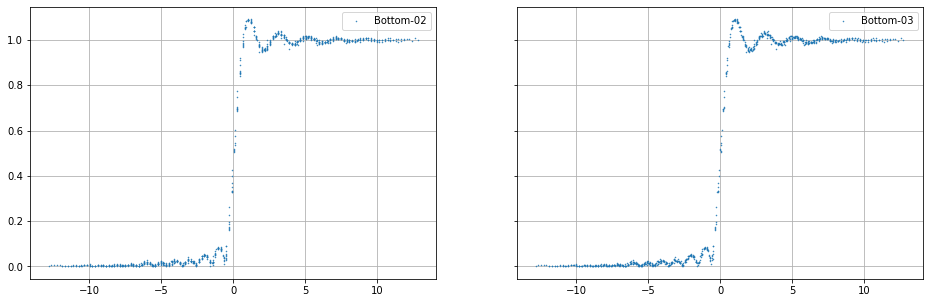

In [29]:
names = [
    "lores-Bottom-02",
    "lores-Bottom-03"
]

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 5))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    ax.plot(x, y, '.', markersize=1, label=name[6:])
    ax.grid(True)
    ax.legend()

So the LHS should tend to approximately zero (just the average (rectified) background. The RHS we have already normalised to unity. For the highres noisy data this will be overlaid with noise on the RHS but will have the same average. On the LHS though the noise will give a larger non-zero average.

Try (co-)sine integral as the difiite integral of a sinc for the edge function, where $\alpha$ controls the edge sharpness and $\delta$ the edge postion. We assume for now the edge is *normalised* to the interval $[0, 1]$.

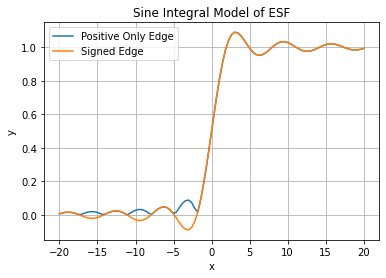

In [137]:
from scipy.special import sici

# cosine integral has range [-π/2, π/2]
def esf_model(x, α=1, δ=0):
    return abs(0.5 + sici(α * (x - δ))[0] / np.pi)

def esf_model_signed(x, α=1, δ=0):
    return 0.5 + sici(α * (x - δ))[0] / np.pi

x = np.linspace(-20, 20, 100)
plt.plot(x, esf_model(x, 1, 0), label='Positive Only Edge')
plt.plot(x, esf_model_signed(x, 1, 0), label='Signed Edge')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Integral Model of ESF')
plt.legend()
plt.grid(True);

Look at the fit for a range of values of $\alpha$.

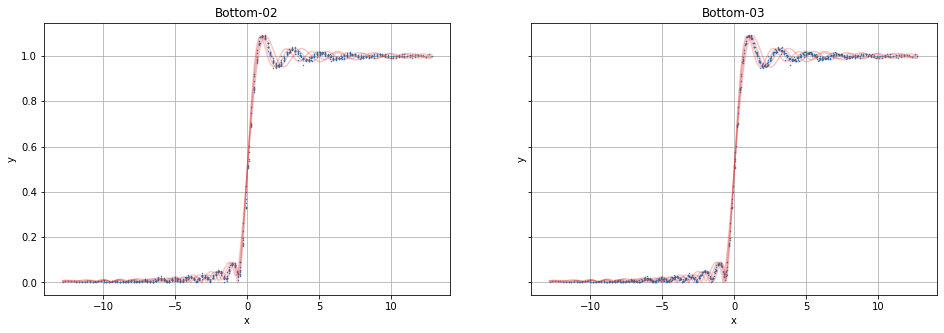

In [139]:
names = [
    "lores-Bottom-02",
    "lores-Bottom-03"
]

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 5))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    ax.plot(x, y, '.', markersize=1)
    ax.grid(True)
    for α in np.linspace(2.5, 3.5, 4):
        ax.plot(x, esf_model(x, α, 0), alpha=0.25, color='C3')
    ax.set_title(name[6:])
    ax.set_xlabel('x')
    ax.set_ylabel('y')

Use dimensional `curve_fit` to determine a best fit value for $\alpha$.

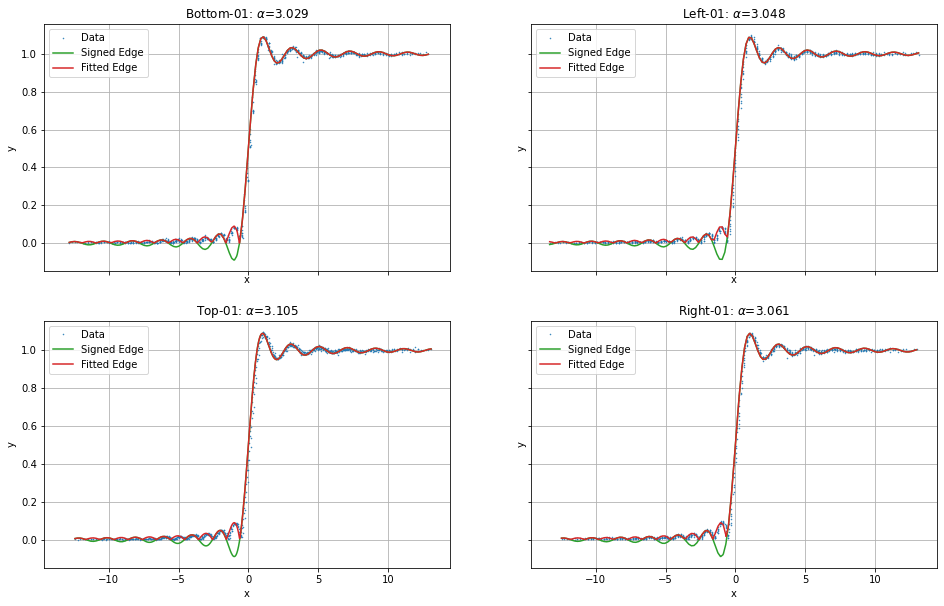

In [142]:
names = [
    "lores-Bottom-01",
    "lores-Left-01",
    "lores-Top-01",
    "lores-Right-01"
]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 10))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    α = curve_fit(esf_model, x, y, p0=3.0)[0][0]
    ax.plot(x, y, '.', markersize=1, label='Data')
    ax.plot(x, esf_model_signed(x, α), color='C2', label='Signed Edge')
    ax.plot(x, esf_model(x, α), color='C3', label=f'Fitted Edge')
    ax.set_title(f'{name[6:]}: $\\alpha$={α:0.3f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend()


There's still the slight suggestion that the slope it is finding is a little too shallow so maybe the model is not perfect. We haven't modelled the noise floor on the LHS yet.

We'll try this with the high res that has a very high noise floor.

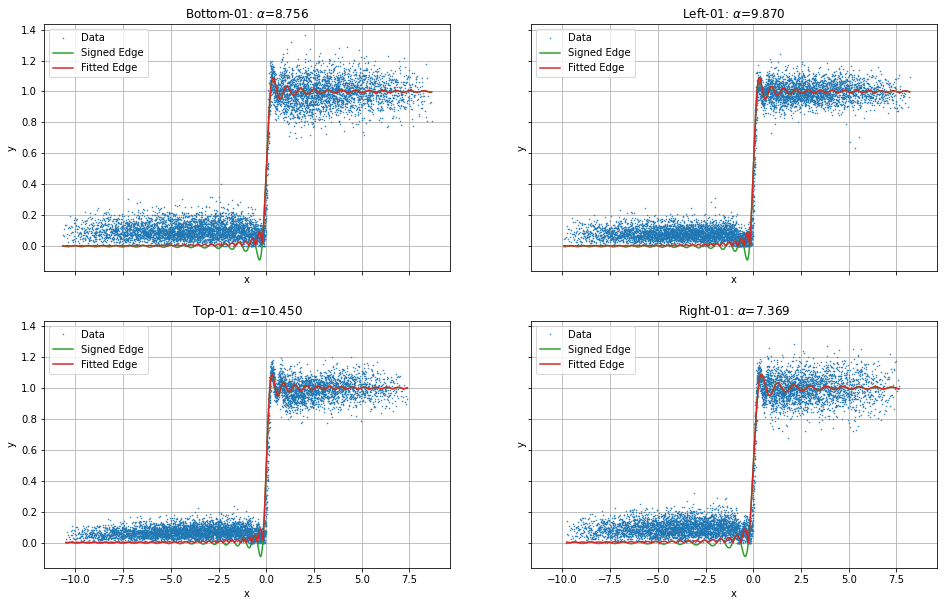

In [143]:
names = [
    "hires-Bottom-01",
    "hires-Left-01",
    "hires-Top-01",
    "hires-Right-01"
]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 10))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    α = curve_fit(esf_model, x, y, p0=3.0)[0][0]
    ax.plot(x, y, '.', markersize=1, label='Data')
    ax.plot(x, esf_model_signed(x, α), color='C2', label='Signed Edge')
    ax.plot(x, esf_model(x, α), color='C3', label=f'Fitted Edge')
    ax.set_title(f'{name[6:]}: $\\alpha$={α:0.3f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend()

This is actually suprisingly good in spite of not fitting the noise floor. The last one is deinitely not steep enough though.
Try letting the position change as well.

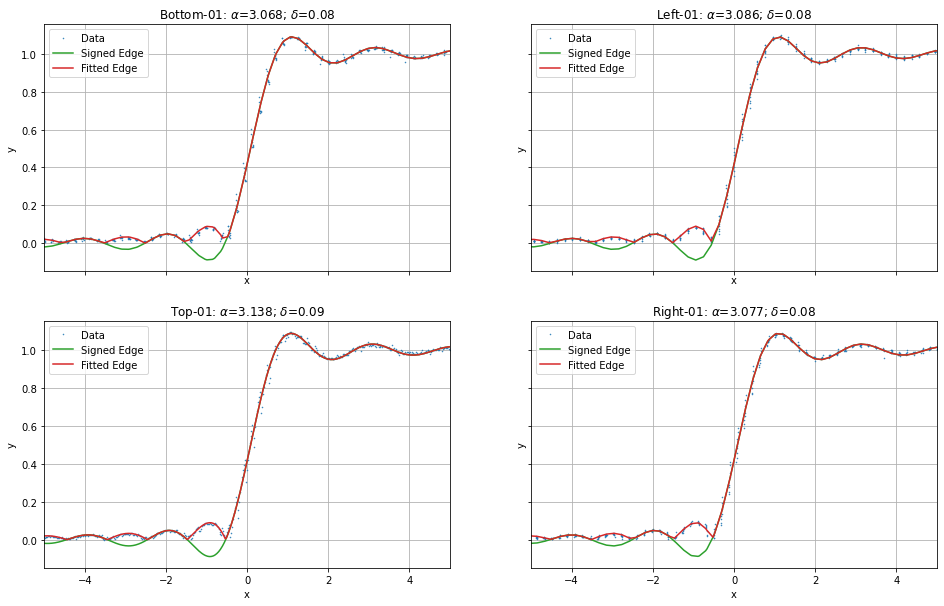

In [144]:
names = [
    "lores-Bottom-01",
    "lores-Left-01",
    "lores-Top-01",
    "lores-Right-01"
]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 10))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    α, δ = curve_fit(esf_model, x, y, p0=(3.0, 0))[0]
    ax.plot(x, y, '.', markersize=1, label='Data') 
    ax.plot(x, esf_model_signed(x, α, δ), color='C2', label='Signed Edge')
    ax.plot(x, esf_model(x, α, δ), color='C3', label='Fitted Edge')
    ax.set_xlim(-5, 5)
    ax.set_title(f'{name[6:]}: $\\alpha$={α:0.3f}; $\\delta$={δ:0.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend()

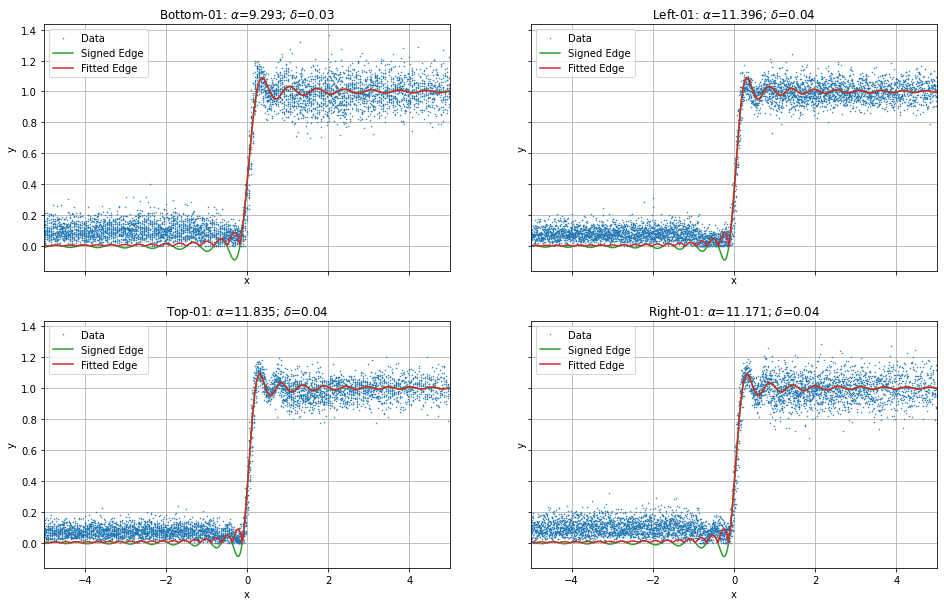

In [145]:
names = [
    "hires-Bottom-01",
    "hires-Left-01",
    "hires-Top-01",
    "hires-Right-01"
]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 10))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    α, δ = curve_fit(esf_model, x, y, p0=(3.0, 0))[0]
    ax.plot(x, y, '.', markersize=1, label='Data') 
    ax.plot(x, esf_model_signed(x, α, δ), color='C2', label='Signed Edge')
    ax.plot(x, esf_model(x, α, δ), color='C3', label='Fitted Edge')
    ax.set_xlim(-5, 5)
    ax.set_title(f'{name[6:]}: $\\alpha$={α:0.3f}; $\\delta$={δ:0.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend()

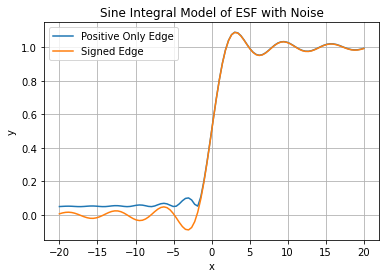

In [146]:
# cosine integral has range [-π/2, π/2]
def esf_model_noise(x, α=1, δ=0, σ=0.05):
    return np.sqrt(σ**2 + (0.5 + sici(α * (x - δ))[0] / np.pi)**2)


x = np.linspace(-20, 20, 100)
plt.plot(x, esf_model_noise(x), label='Positive Only Edge')
plt.plot(x, esf_model_signed(x), label='Signed Edge')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Integral Model of ESF with Noise')
plt.legend()
plt.grid(True);

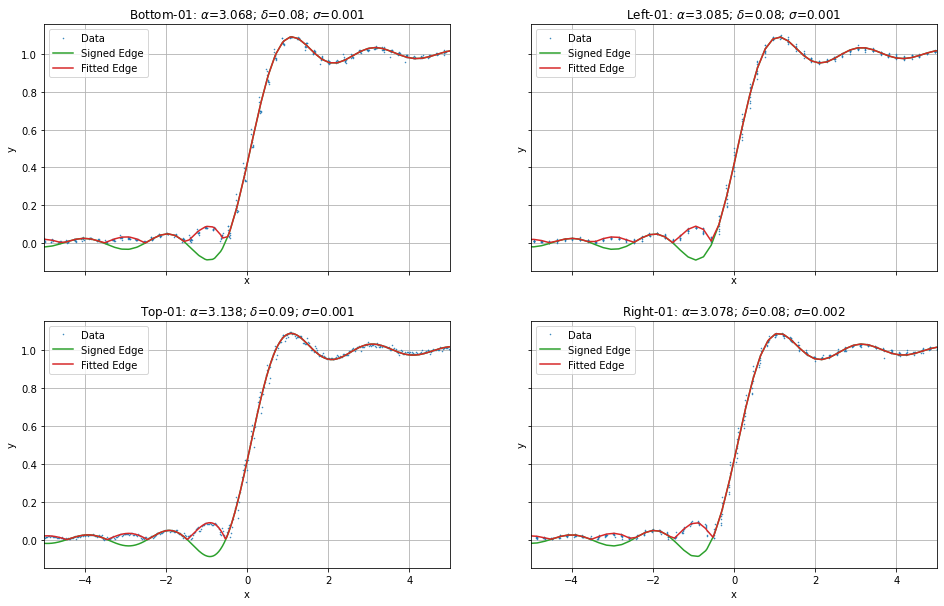

In [149]:
names = [
    "lores-Bottom-01",
    "lores-Left-01",
    "lores-Top-01",
    "lores-Right-01"
]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 10))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    α, δ, σ = curve_fit(esf_model_noise, x, y, p0=(3.0, 0, 0.05))[0]
    ax.plot(x, y, '.', markersize=1, label='Data') 
    ax.plot(x, esf_model_signed(x, α, δ), color='C2', label='Signed Edge')
    ax.plot(x, esf_model_noise(x, α, δ, σ), color='C3', label='Fitted Edge')
    ax.set_xlim(-5, 5)
    ax.set_title(f'{name[6:]}: $\\alpha$={α:0.3f}; $\\delta$={δ:0.2f}; $\\sigma$={σ:0.3f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend()

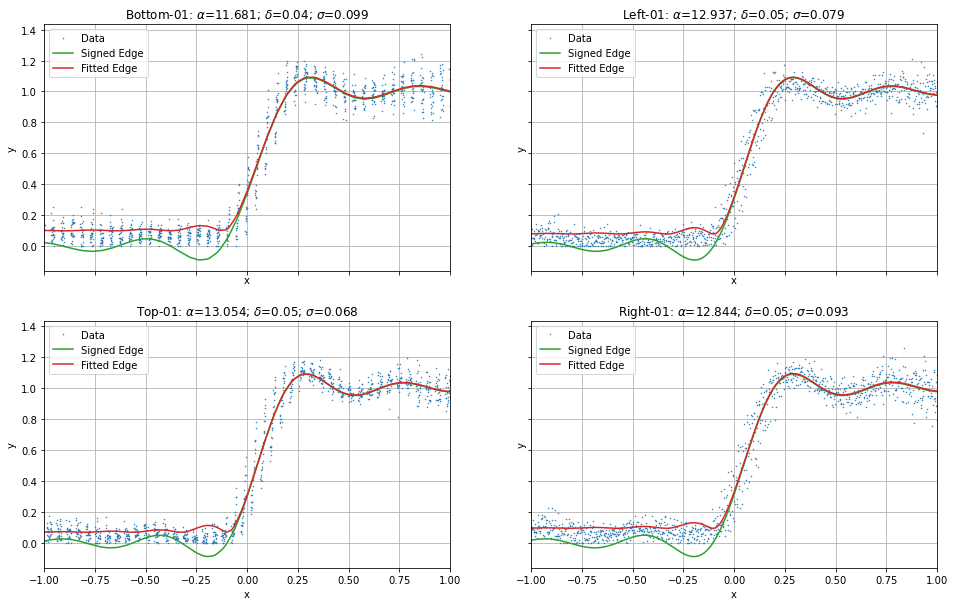

In [152]:
names = [
    "hires-Bottom-01",
    "hires-Left-01",
    "hires-Top-01",
    "hires-Right-01"
]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 10))
for ax, name in zip(axs.flat, names):
    x = np.load(join('esf', f'{name}-x.npy'))
    y = np.load(join('esf', f'{name}-y.npy'))
    α, δ, σ = curve_fit(esf_model_noise, x, y, p0=(3.0, 0, 0.05))[0]
    ax.plot(x, y, '.', markersize=1, label='Data') 
    ax.plot(x, esf_model_signed(x, α, δ), color='C2', label='Signed Edge')
    ax.plot(x, esf_model_noise(x, α, δ, σ), color='C3', label='Fitted Edge')
    ax.set_xlim(-1, 1)
    ax.set_title(f'{name[6:]}: $\\alpha$={α:0.3f}; $\\delta$={δ:0.2f}; $\\sigma$={σ:0.3f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend()

Doesn't look like noise model is quite correct ... It may be good enough though allowing fit to be dominated by edge and RHS. We should maybe try and avoid the extremely noisy case. Even with the 1024^2 images we could average up (done in complex plane?) to get a better snr. Either that or we need proper signed or complex images.

Note that noise stats are not quite right either - we are sort of assuming that with no signal it will be Gaussian about a certain level when it will be more complicated than that (Rayleigh for a single element coil).

As prerequisites we want RHS to tend to unity, $\delta$ to approximately zero, and some initial estimate of $\alpha$ - maybe from trying to fit edge? or from known pixel size.

There is still some edge bend or misalignment in this data.

In [4]:
def rhs_normalised(y):
    N = 8
    return y / y[-len(y) // N:].mean()

def empirical_esf(roi, pix_dims, intercept, slope):
    """
    Unnormalised edge spread function, returned as function of displacement from edge im mm
    TODO: fix magic numbers
    """
    # Get the signed distance of each pixel (position) from the edge line
    # This is purely geometrical and it doesn't matter if we do it
    # as x distance or y distance provided we take the projected pixel size
    # into account. Here, we take the geometrical mean of two estimates of the perpendicular
    # distance - this should also work even for non-isotropic pixels.
    nrows, ncols = roi.shape
    X, Y = np.meshgrid(np.arange(ncols), np.arange(nrows))

    x_shifts_at_y = (np.arange(nrows) - intercept) / slope
    X_shifted = (X - x_shifts_at_y[Y])
    y_shifts_at_x = np.arange(ncols) * slope + intercept
    Y_shifted = (Y - y_shifts_at_x[X])

    alpha = np.arctan(slope)
    Dists_mm = np.sqrt(
        abs(X_shifted * Y_shifted * np.sin(alpha) * np.cos(alpha) * pix_dims[0] * pix_dims[1])
    ) * np.sign(X_shifted)

    x_mm = Dists_mm.ravel()
    y = roi.ravel()
    sort_indices = np.argsort(x_mm)
    x_mm, y = x_mm[sort_indices], y[sort_indices]
    
    # normalize to unity in the RHS limit, assume 0 in RHS limit
    return x_mm, rhs_normalised(y)
    

def sinc_model(x_mm, width):  
    x_grid = np.linspace(x_mm.min()-0.1, x_mm.max()+0.1, 4096)
    dx = x_grid[1] - x_grid[0]
    
    s = np.sinc(x_grid / width)
 
    # line model is normalized to unit area so integral will got from 0 to 1 
    e = cumtrapz(s / (s.sum() * dx), dx=dx, initial=0)
    return interp1d(x_grid, e)(x_mm)


def sinc_model_abs(x_mm, width):
    return abs(sinc_model(x, width))
    
def esf_model(x_mm, sigma, width, centre, scale):
    n = len(x_mm)
    if n < 10:
        warn(f'Bad data length x_mm: {n}')
        
    if not np.all(np.isfinite(x_mm)):
        warn(f'Bad data range x_mm: ...')
        
    x_grid = np.linspace(x_mm.min()-abs(centre)-0.1, x_mm.max()+abs(centre)+0.1, n)
    dx = x_grid[1] - x_grid[0]
    #print(dx)
    assert dx > 0
    
    s = np.sinc(x_grid / width)
    assert np.all(np.isfinite(s))
    assert s.sum() > 1e-5
    
    if sigma > 0.5 * dx:
        g = np.exp(-x_grid**2 / (2*sigma**2))
        assert np.all(np.isfinite(g))
        if g.sum() > 1e-6:
            g /= g.sum()
        else:
            if (g>0).sum() > 1:
                warn(f'g has {(g>0).sum()} non-zeros when replacing by delta; sigma={sigma}')
            g = np.zeros_like(g)
            g[np.searchsorted(x_grid, 0)] = 1
    

        assert g.sum() > 1e-5
        c = np.convolve(g, s, mode='same')
        assert np.all(np.isfinite(c))
        assert c.sum() > 1e-5
    
        c /= (c.sum() * dx)
        assert np.all(np.isfinite(c))
    else:
        c = s / (s.sum() * dx)

    # line model is normalized to unit area so integral will got from 0 to 1 
    e = cumtrapz(c, dx=dx, initial=0)
    assert np.all(np.isfinite(e))

    ei = interp1d(x_grid - centre, e)
    if not np.all(np.isfinite(ei(x_mm))):
        warn(f'Bad model params: sigma: {sigma}, width: {width}, centre: {centre}, scale: {scale}')
    return ei(x_mm) * scale


def esf_model_abs(x_mm, sigma, width, centre, scale):
    return abs(
        esf_model(x_mm, sigma, width, centre, scale)
    )


def fit_sinc_model(x_mm, y):
    # looks like it's very sensitive to the starting point for sinc width
    # we don't know the pixel size here though 
    #       (mm)    sigma  width centre scale
    lower_bounds = (0.15,)
    start_points = (0.75,)
    upper_bounds = (4.0,)

    popt, _ = curve_fit(
        sinc_model_abs,
        x_mm, y,
        p0=start_points,
        #bounds=(lower_bounds, upper_bounds),
        #loss='soft_l1'
    )
    return popt


def fit_esf_model(x_mm, y):
    """
        TODO: fix magic numbers
    """
    # 
    #print(f'{y.min()} -> {y.max()}')
    #centre_0 = x_mm[np.nonzero(y > 0.5)[0][0]]
    #width_0 = x_mm[np.nonzero(y > 0.9)[0][0]] - x_mm[np.nonzero(y < 0.1)[0][-1]]
    #width_0 = 0.1 # mm
    #sigma_0 = width_0 / 5
    #print(f'centre_0 = {centre_0}')
    #print(f'width_0 = {width_0}')
    #print(f'sigma_0 = {sigma_0}')
    #centre_0 = -10.44670833962223
    #width_0 = -10.360034012099028
    #sigma_0 = -2.0720068024198057

    # looks like it's very sensitive to the starting point for sinc width
    # we don't know the pixel size here though 
    #       (mm)    sigma  width centre scale
    lower_bounds = (0.005, 0.05, -0.1,     0.9)
    start_points = (0.01,  0.25,  0,     1.0)
    upper_bounds = (0.2,   5.0,  0.1,     1.1)
    #print(f'lower = {lower_bounds}, initial = {start_points}, upper = {upper_bounds}')
    
    # can set sigma= a vector of standard deviations so we could set higher values for the LHS
    # where the noise floor is causing a problem
    # we need some noise estimate (maybe from stddev of rhs limit), then penalise points that are
    # at or below this level
    # -- doesn't seem to help - try limiting fit o central region basd on pixel size
    # eg: max_x = 4 * pix_sixe (can't do here - we don't know pix size! calling fn could do it)


    noise = y[7*len(y)//8:].std()
    sigma = np.ones_like(y)
    noise_effected = y < noise
    sigma[noise_effected] = 2 * noise / (noise + y[noise_effected])
    n = len(y)
    popt, _ = curve_fit(
        esf_model_abs,
#        x_mm[n//3:-n//3], y[n//3:-n//3],
        x_mm, y,
        sigma=sigma,
        p0=start_points,
        bounds=(lower_bounds, upper_bounds),
        method='dogbox',
#        loss='soft_l1'
        loss='linear'
    )
    #print(f'optimal = {popt}')
#    return np.asarray_chkfinite(popt)
    return popt

def fitted_sinc(x_mm, y):
    width_opt = fit_sinc_model(x_mm, y)
    print(width_opt)
    return sinc_model(x_mm, width_opt)

def fitted_sinc_abs(x_mm, y):
    return abs(fitted_sinc(x_mm, y))

def fitted_esf(x_mm, y):
    sigma_opt, width_opt, centre_opt, scale_opt = fit_esf_model(x_mm, y)
    return esf_model(x_mm, sigma_opt, width_opt, centre_opt, scale_opt)

def fitted_esf_abs(x_mm, y):
    return abs(fitted_esf(x_mm, y))

[0.76113157]


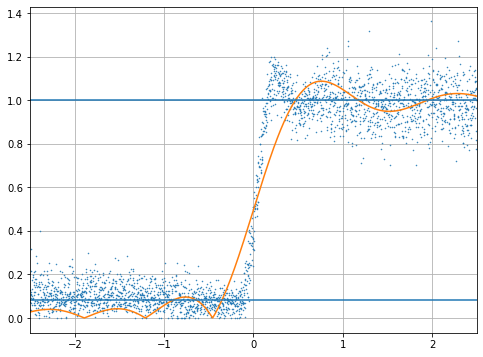

In [5]:
plt.figure(figsize=(8, 6))
x = np.load('esf/hires-Bottom-02-x.npy')
y = np.load('esf/hires-Bottom-02-y.npy')
noise = y[7*len(y)//8:].std()
limit = y[7*len(y)//8:].mean()
plt.plot(x, y, '.', markersize=1)
plt.plot(x, fitted_sinc_abs(x, y))
plt.xlim(-2.5, 2.5)
plt.axhline(noise)
plt.axhline(limit)
plt.grid(True);

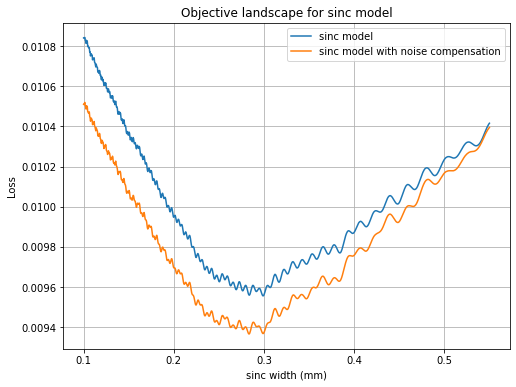

In [6]:
plt.figure(figsize=(8, 6))
x = np.load('esf/hires-Bottom-02-x.npy')
y = np.load('esf/hires-Bottom-02-y.npy')
widths = np.linspace(0.1, 0.55, 1000)

def sinc_model_residuals(x_mm, y, widths):
    return [
        ((sinc_model_abs(x_mm, width) - y)**2).mean()
        for width in widths
    ]


def sinc_model_residuals_with_noise(x_mm, y, widths):
    return [
        ((sinc_model_abs(x_mm, width) - np.sqrt(abs((y**2 - noise**2)))) **2).mean() + noise/45
        for width in widths
    ]

sm_residuals = sinc_model_residuals(x, y, widths)
smn_residuals = sinc_model_residuals_with_noise(x, y, widths)
plt.plot(widths, sm_residuals, label='sinc model')
plt.plot(widths, smn_residuals, label='sinc model with noise compensation')
plt.legend()
plt.grid(True)
plt.title('Objective landscape for sinc model')
plt.xlabel('sinc width (mm)')
plt.ylabel('Loss');

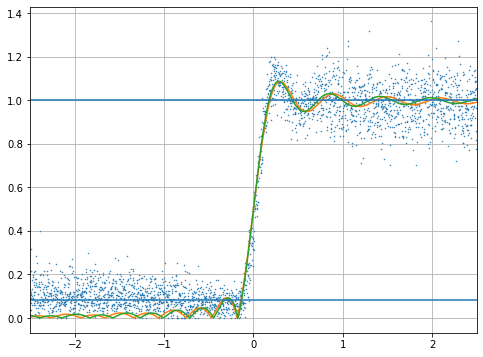

In [7]:
width_sm = widths[np.argmin(sm_residuals)]
width_smn = widths[np.argmin(smn_residuals)]

plt.figure(figsize=(8, 6))
plt.plot(x, y, '.', markersize=1)
plt.plot(x, sinc_model_abs(x, width_sm))
plt.plot(x, sinc_model_abs(x, width_smn))

plt.xlim(-2.5, 2.5)
plt.axhline(noise)
plt.axhline(limit)
plt.grid(True);

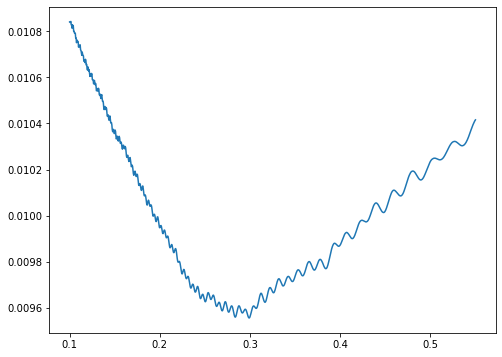

In [8]:
plt.figure(figsize=(8, 6))
x = np.load('esf/hires-Bottom-02-x.npy')
y = np.load('esf/hires-Bottom-02-y.npy')

widths = np.linspace(0.1, 0.55, 1000)
def fit_metric_sinc_model(x_mm, y, widths):
    return [abs(sinc_model_abs(x_mm, width) - y).mean() for width in widths]
plt.plot(widths, sinc_model_residuals(x, y, widths))

[1.02797235]


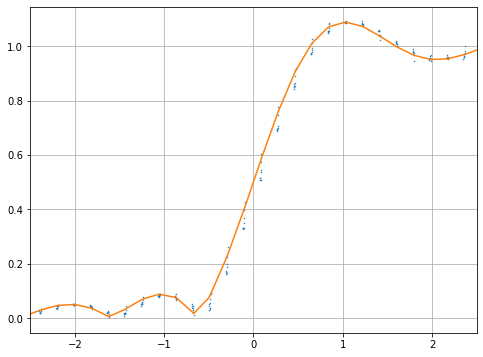

In [9]:
plt.figure(figsize=(8, 6))
x = np.load('esf/lores-Bottom-02-x.npy')
y = np.load('esf/lores-Bottom-02-y.npy')
plt.plot(x, y, '.', markersize=1)
plt.plot(x, fitted_sinc_abs(x, y))
plt.xlim(-2.5, 2.5)
plt.grid(True);

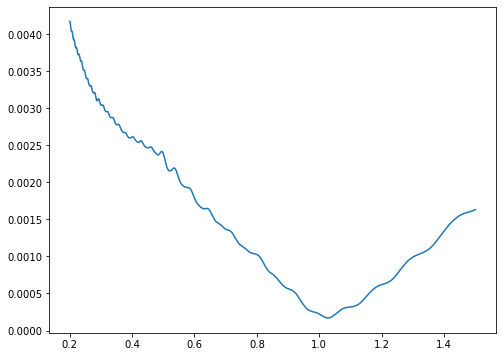

In [10]:
plt.figure(figsize=(8, 6))
x = np.load('esf/lores-Bottom-02-x.npy')
y = np.load('esf/lores-Bottom-02-y.npy')

widths = np.linspace(0.2, 1.5, 1000)
def fit_metric_sinc_model(x_mm, y, widths):
    return [((sinc_model_abs(x_mm, width) - y) **2).mean() for width in widths]
plt.plot(widths, fit_metric_sinc_model(x, y, widths))

[1.02797235]


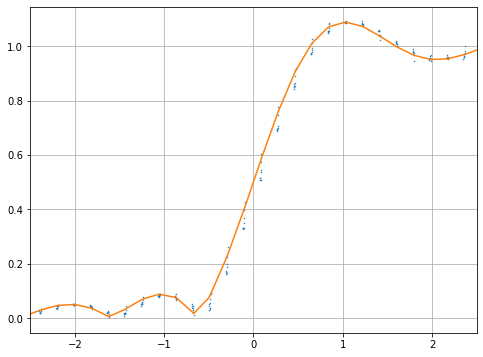

In [11]:
plt.figure(figsize=(8, 6))
x = np.load('esf/lores-Bottom-02-x.npy')
y = np.load('esf/lores-Bottom-02-y.npy')
plt.plot(x, y, '.', markersize=1)
plt.plot(x, fitted_sinc_abs(x, y))
plt.xlim(-2.5, 2.5)
plt.grid(True);

In [12]:
from scipy.optimize import basinhopping

basinhopping(
    func, x0,
    niter=100, T=1.0, stepsize=0.5,
    minimizer_kwargs=None, take_step=None,
    accept_test=None, callback=None,
    interval=50, disp=False, niter_success=None, seed=None
)

NameError: name 'func' is not defined